In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.lines as mlines

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_2832\713569803.py:5: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [24]:
data = pd.read_excel("TF_BIRTHS.xlsx", parse_dates=True)
data.rename(columns={"DT_DATE": "date", "MS_NUM_BIRTHS": "nb_birth"}, inplace=True)
print(data)
data.info()
data.describe()
# une moyenne de 123 800 naissances par an (sur les 29 ans enregistrées) -> cohérent

            date  nb_birth
0     1992-01-01       219
1     1992-01-02       331
2     1992-01-03       420
3     1992-01-04       282
4     1992-01-05       252
...          ...       ...
10953 2021-12-27       341
10954 2021-12-28       377
10955 2021-12-29       338
10956 2021-12-30       325
10957 2021-12-31       229

[10958 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10958 entries, 0 to 10957
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      10958 non-null  datetime64[ns]
 1   nb_birth  10958 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 171.3 KB


c:\Users\Utilisateur\anaconda3\envs\libDataScience\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,nb_birth
count,10958.000000
mean,327.624019
std,80.125454
min,148.000000
25%,237.000000
50%,358.000000
75%,389.000000
max,493.000000


            date  nb_birth
9862  2019-01-01       206
9863  2019-01-02       327
9864  2019-01-03       338
9865  2019-01-04       358
9866  2019-01-05       215
...          ...       ...
10222 2019-12-27       392
10223 2019-12-28       204
10224 2019-12-29       207
10225 2019-12-30       310
10226 2019-12-31       302

[365 rows x 2 columns]


<AxesSubplot: title={'center': 'First plot of raw data for year 2019'}, xlabel='date', ylabel='nb_birth'>

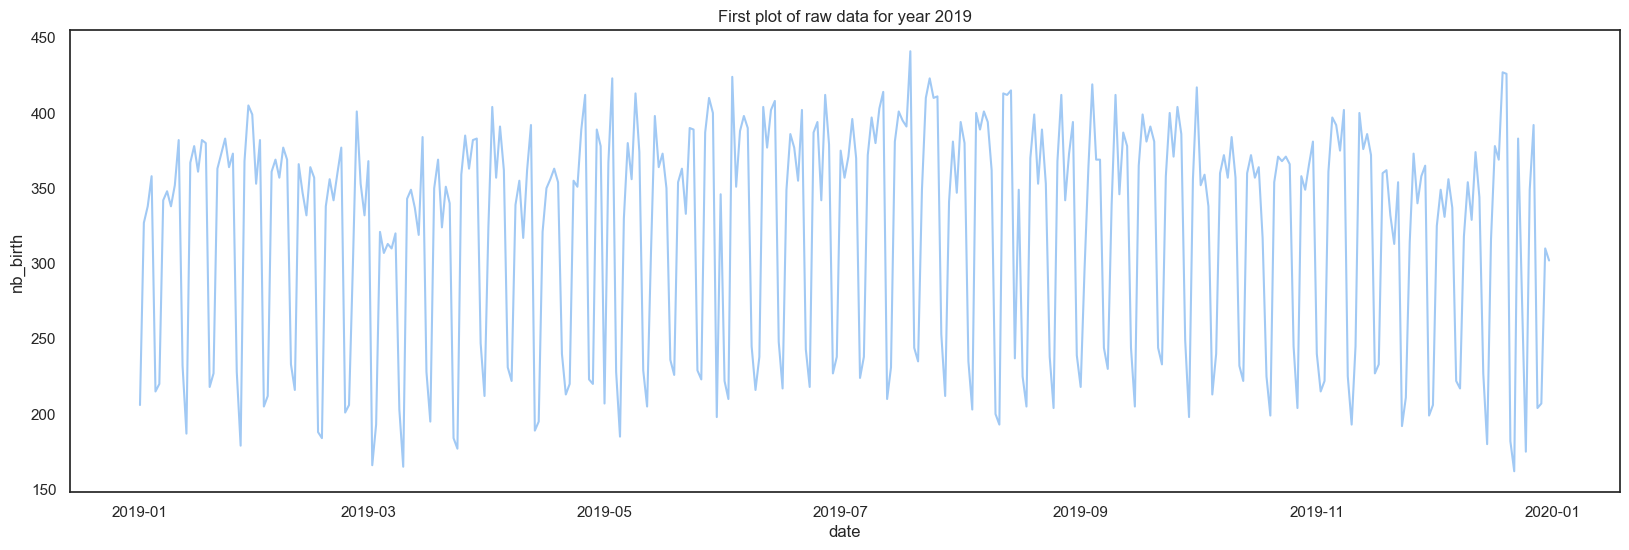

In [26]:
# simple plot of 2019 data
# print raw and smoothed data for 2019
annee = 2019
sub_data = data[data['date'].dt.year == annee].copy()
print(sub_data)

plt.figure(figsize=(20, 5))
plt.title("First plot of raw data for year 2019")
sns.lineplot(data=sub_data, x="date", y="nb_birth")


In [33]:
# get the sundays of 2019 
df_sundays = pd.DataFrame({"date":pd.date_range("2019-01-01", "2019-12-31")})
df_sundays['is_sunday'] = df_sundays['date'].dt.day_of_week==6
df_sundays['value'] = df_sundays.is_sunday.map({True:1000, False:0})
print(df_sundays)

# get public holidays of 2019
public_holidays = pd.DataFrame({"date": ["2019-01-01", "2019-04-22", "2019-05-01", "2019-05-30", "2019-06-10", "2019-07-21", "2019-08-15", "2019-11-01", "2019-11-11", "2019-12-25"]})
public_holidays['date'] = pd.to_datetime(public_holidays['date'])

,date,is_sunday,value
0,2019-01-01,False,0
1,2019-01-02,False,0
2,2019-01-03,False,0
3,2019-01-04,False,0
4,2019-01-05,False,0
...,...,...,...
360,2019-12-27,False,0
361,2019-12-28,False,0
362,2019-12-29,True,1000
363,2019-12-30,False,0


Text(0.5, 1.0, 'Fig 1 : Impact of week-ends and public holidays on birth count')

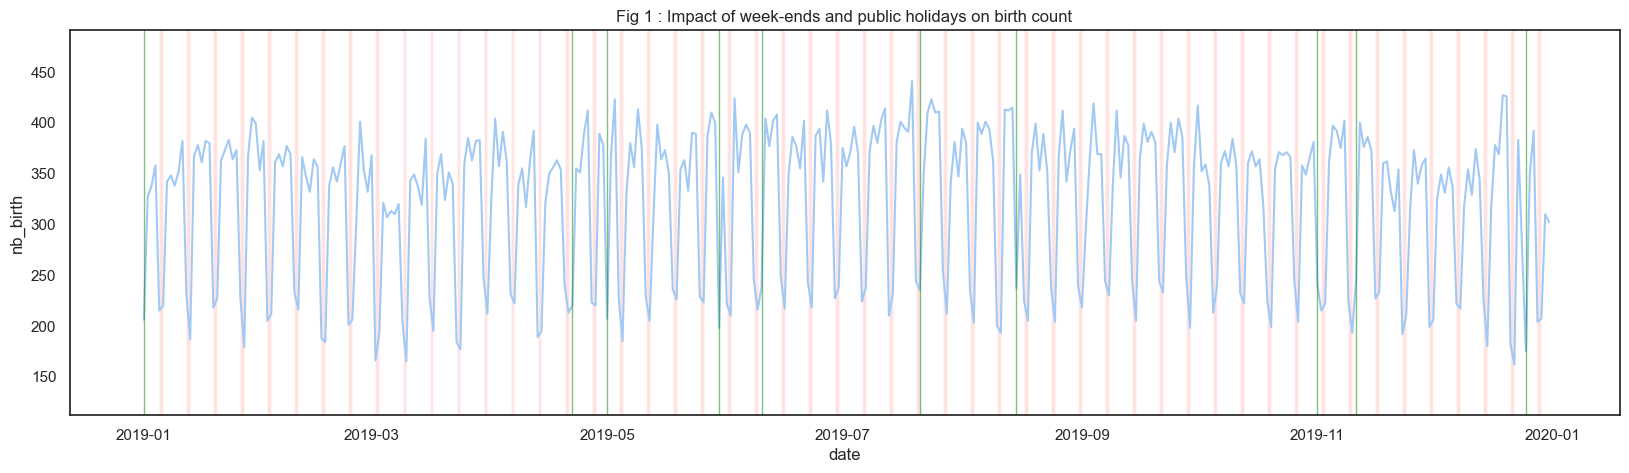

In [76]:
# Validate that drops correspond to week-ends or public holidays

plt.figure(figsize=(20, 5))

sns.set_theme(style="white", palette="pastel")
sns.lineplot(data=sub_data, x="date", y="nb_birth")

# plot vertical line for public holidays
for i in range(len(public_holidays)):
    line = public_holidays.iloc[i]
    date = line["date"]
    plt.axvline(date, color="green", linewidth=1, alpha=0.5)

# plot color bar for sundays (variante with barplot)
plt.bar(
    x=df_sundays["date"],
    height=df_sundays["value"],
    color="r",
    alpha=0.3,
    width=-1,
    align="edge",
)
plt.ylim(min(sub_data["nb_birth"]) - 50, max(sub_data["nb_birth"]) + 50)
plt.title("Fig 1 : Impact of week-ends and public holidays on birth count")

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_2832\1728506770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['smooth_gaussian'] = gaussian_filter1d(np.array(sub_data["nb_birth"]), sigma=sigma)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_2832\1728506770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data["smooth_rolling_mean"] = sub_data.nb_birth.rolling(7).mean()


<AxesSubplot: xlabel='date', ylabel='nb_birth'>

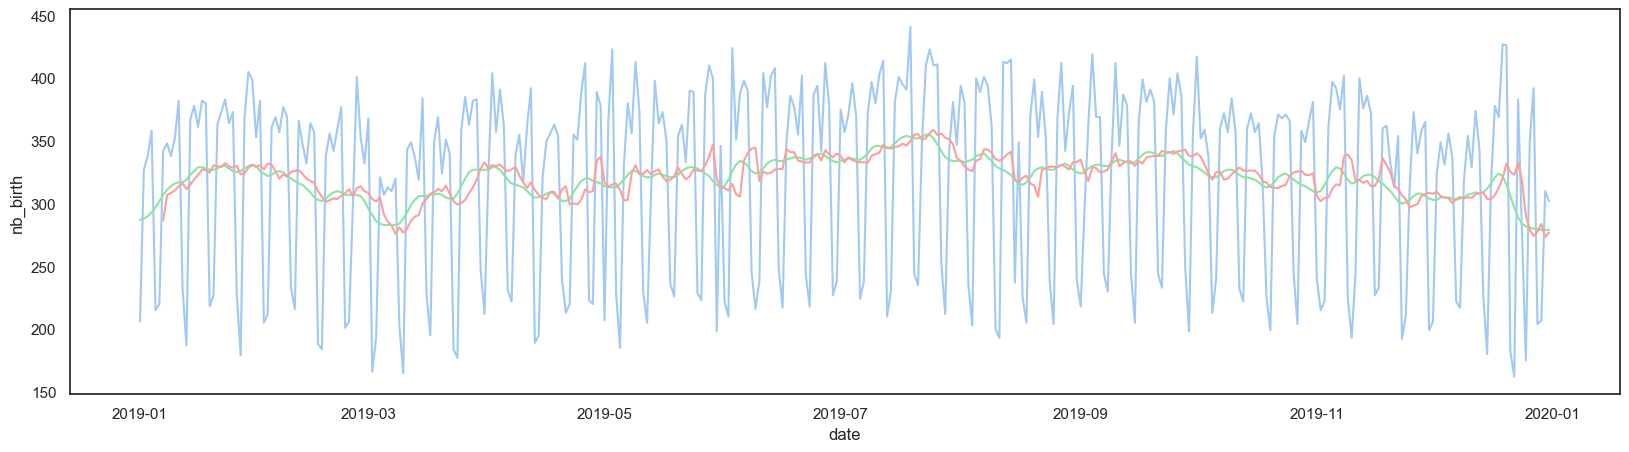

In [53]:
# compute smoothing using gaussian filter 1d de Scipy
sigma = 3
sub_data['smooth_gaussian'] = gaussian_filter1d(np.array(sub_data["nb_birth"]), sigma=sigma)
sub_data["smooth_rolling_mean"] = sub_data.nb_birth.rolling(7).mean()

plt.figure(figsize=(20, 5))

sns.set_theme(style="white", palette="pastel")
sns.lineplot(data=sub_data, x="date", y="nb_birth")
sns.lineplot(data=sub_data, x="date", y="smooth_gaussian", color="g")
sns.lineplot(data=sub_data, x="date", y="smooth_rolling_mean", color="r")

# choose rolling mean because better reflect of reality : childbirth not given on week-end will be given on the rest of the week 
# -> make sense to average week wise, not only smoothen mathematically

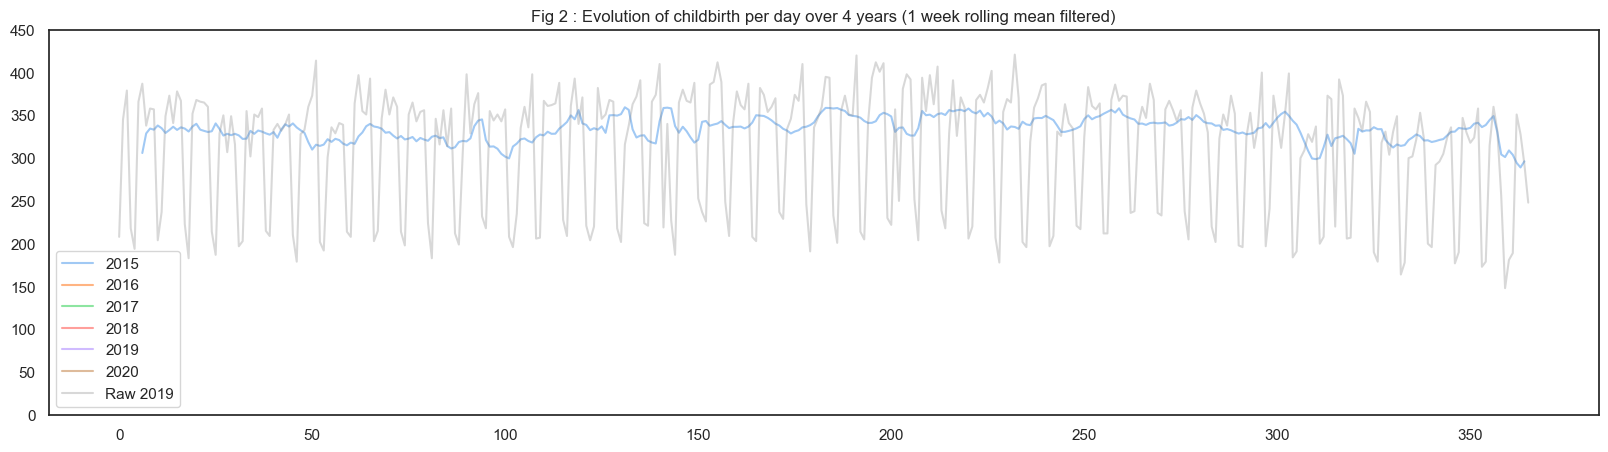

In [75]:
# superpose several years to see tendancy
plt.figure(figsize=(20, 5))
sns.set_theme(style="white", palette="pastel")

# year loop
year_data = pd.DataFrame()

for year in range(2015, 2021):
    year_data_smoothed = pd.DataFrame()
    data_tmp = data.loc[
        data['date'].dt.year==year,
        :,
    ].copy()

    # compute smoothing using rolling mean of 7 days
    year_data_smoothed = data_tmp['nb_birth'].rolling(7).mean() 

    year_data[str(year)] = year_data_smoothed.copy() # sauve Nan apres la premiere année
    plt.plot(range(365), year_data[str(year)], label=year)


# add 2019 on plot (without filter)
data_2019 = data.loc[data['date'].dt.year==year, :]
plt.plot(
    range(366), data_2019["nb_birth"], color="grey", alpha=0.3, label="Raw 2019"
)

plt.ylim((0, 450))
plt.legend()
plt.title("Fig 2 : Evolution of childbirth per day over 4 years (1 week rolling mean filtered)")
plt.show()

Text(0.5, 1.0, 'Plot of the cycles of the moon on 2019')

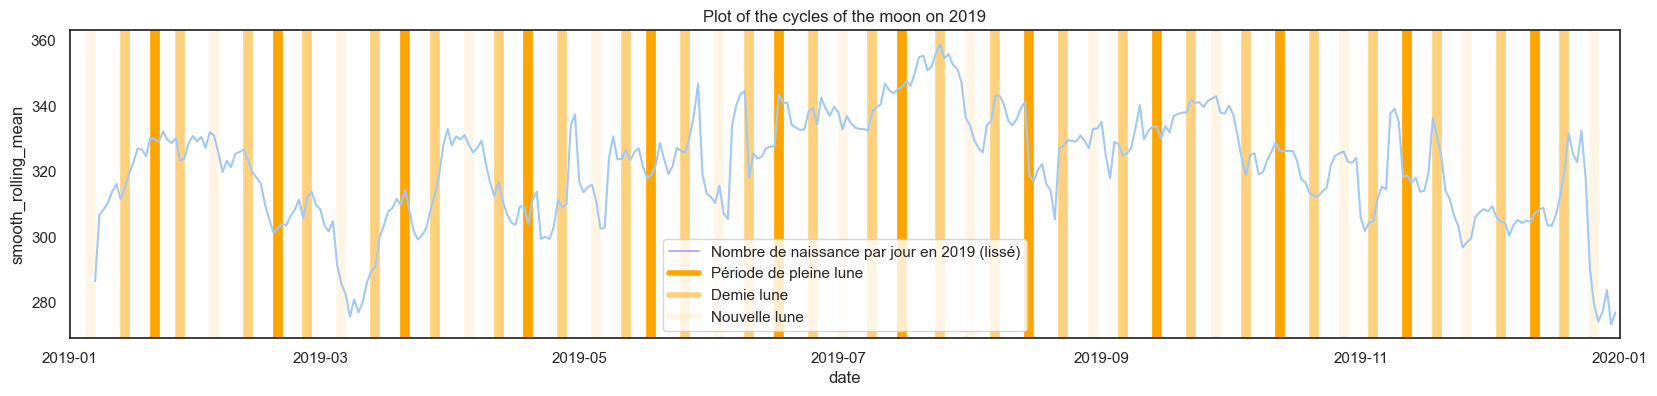

In [58]:
# moon calendar 2019
moon_2019 = pd.read_csv('moon2019.txt')

moon_2019["Date"] = pd.to_datetime(moon_2019["Date"])
moon_2019.head()

plt.figure(figsize=(20, 4))

for i in range(len(moon_2019)):
    line = moon_2019.iloc[i]
    date = line["Date"]
    type = line["Moon"]
    if type == 1:
        plt.axvline(date, color="orange", linewidth=7, alpha=1)
    elif type == 0.5:
        plt.axvline(date, color="orange", linewidth=7, alpha=0.5)
    elif type == 0:
        plt.axvline(date, color="orange", linewidth=7, alpha=0.1)

sns.lineplot(data=sub_data, x="date", y="smooth_rolling_mean", color="b")

plt.xlim(pd.to_datetime("2019-01-01"), pd.to_datetime("2020-01-01"))

plt.legend(
    handles=[
        mlines.Line2D(
            [],
            [],
            color="blue",
            alpha=0.3,
            markersize=15,
            label="Nombre de naissance par jour en 2019 (lissé)",
        ),
        mlines.Line2D(
            [],
            [],
            color="orange",
            alpha=1,
            linewidth=4,
            markersize=15,
            label="Période de pleine lune",
        ),
        mlines.Line2D(
            [],
            [],
            color="orange",
            alpha=0.5,
            linewidth=4,
            markersize=15,
            label="Demie lune"
        ),
        mlines.Line2D(
            [],
            [],
            color="orange",
            alpha=0.1,
            linewidth=4,
            markersize=15,
            label="Nouvelle lune",
        ),
    ]
)

plt.title("Plot of the cycles of the moon on 2019")


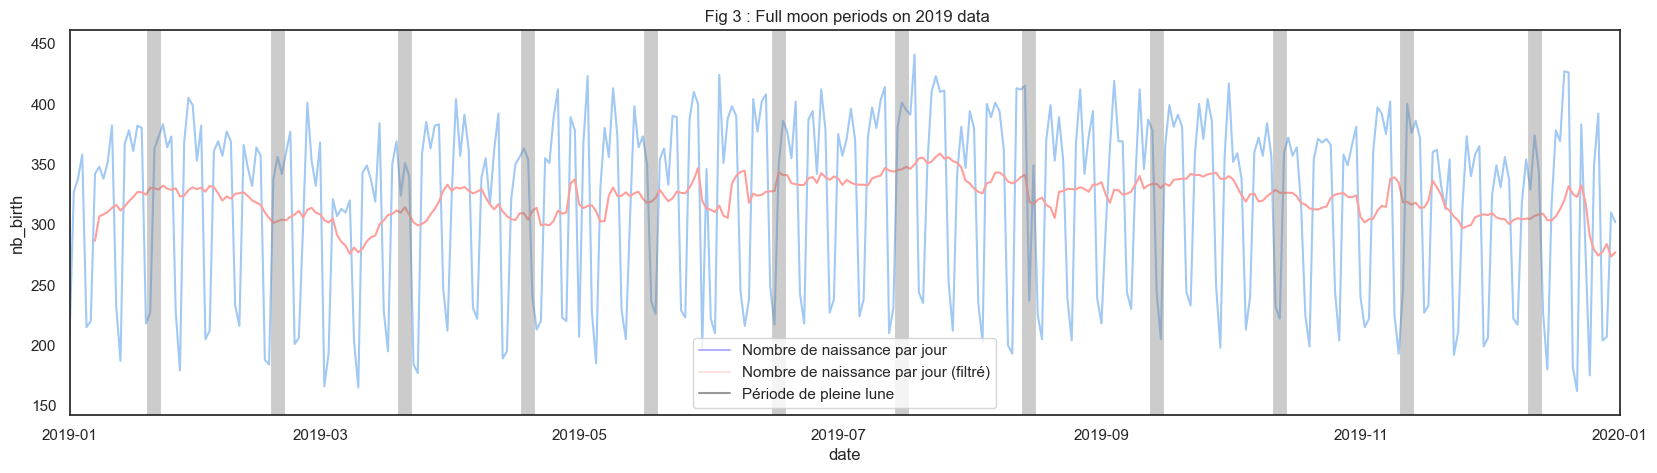

In [56]:
# final plot : 2019 filtered and unfiltered, sundays, full moons
import matplotlib.lines as mlines

plt.figure(figsize=(20, 5))

sns.set_theme(style="white", palette="pastel")
sns.lineplot(data=sub_data, x="date", y="nb_birth")
sns.lineplot(data=sub_data, x="date", y="smooth_rolling_mean", color="r")

# plot periods of full moon
for i in range(len(moon_2019)):
    line = moon_2019.iloc[i]
    date = line["Date"]
    type = line["Moon"]
    if type == 1:
        plt.axvline(date, color="grey", linewidth=10, alpha=0.4)


plt.ylim(min(sub_data["nb_birth"]) - 20, max(sub_data["nb_birth"]) + 20)
plt.xlim(pd.to_datetime("2019-01-01"), pd.to_datetime("2020-01-01"))

plt.title(
    " Fig 3 : Full moon periods on 2019 data"
)

# plot legend
plt.legend(
    handles=[
        mlines.Line2D(
            [],
            [],
            color="blue",
            alpha=0.3,
            markersize=15,
            label="Nombre de naissance par jour",
        ),
        mlines.Line2D(
            [],
            [],
            color="r",
            alpha=0.3,
            markersize=15,
            label="Nombre de naissance par jour (filtré)",
        ),
        mlines.Line2D(
            [],
            [],
            color="black",
            alpha=0.4,
            markersize=15,
            label="Période de pleine lune",
        ),
    ]
)